In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.pipeline import make_pipeline
from sklearn import svm
import collections
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from lightgbm.sklearn import LGBMRegressor

**<font size = 6 color = "#414141">一、数据预处理</font>**

**<font size = 5 color = "#414141">1.1数据获取</font>**

In [2]:
train_data = pd.read_csv('used_car_train_20200313.csv',sep = ' ')#因为列之间由空格分隔所以sep = ' '
test_data = pd.read_csv('used_car_testB_20200421.csv',sep = ' ')

In [3]:
train_data.head(10)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
5,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,...,0.260246,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573
6,6,2402,19990411,13.0,4,0.0,0.0,1.0,150,15.0,...,0.267998,0.117675,0.142334,0.025446,0.028174,-4.902200,1.610616,-0.834605,-1.996117,-0.103180
7,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,...,0.239506,0.000000,0.122943,0.039839,0.082413,3.693829,-0.245014,-2.192810,0.236728,0.195567
8,8,2974,20030205,19.0,1,2.0,1.0,1.0,179,15.0,...,0.263833,0.116583,0.144255,0.039851,0.024388,-4.925234,1.587796,0.075348,-1.551098,0.069433
9,9,82021,19980101,7.0,7,5.0,0.0,0.0,88,15.0,...,0.262473,0.068267,0.012176,0.010291,0.098727,-1.089584,0.600683,-4.186210,0.198273,-1.025822


In [4]:
test_data.head(10)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
5,200005,142813,19990006,37.0,18,6.0,0.0,0.0,125,15.0,...,0.261526,0.000000,0.000000,0.046879,0.110726,2.646412,-2.440519,-2.255588,0.712270,-3.314079
6,200006,135370,19980503,36.0,6,4.0,0.0,0.0,75,15.0,...,0.262053,0.000000,0.000000,0.018354,0.098361,3.502686,-1.248059,-4.574356,0.570019,1.083525
7,200007,7138,20040201,88.0,14,3.0,0.0,1.0,125,15.0,...,0.251400,0.109093,0.027522,0.051102,0.108286,-4.432940,1.144211,-0.751093,1.529875,-0.903551
8,200008,7977,20110209,77.0,0,3.0,1.0,1.0,140,7.0,...,0.259374,0.109086,0.081928,0.076956,0.066791,-5.184557,0.286968,2.080466,0.626122,0.684674
9,200009,104001,19991012,30.0,6,1.0,0.0,0.0,74,15.0,...,0.240051,0.000000,0.110855,0.030618,0.080079,3.959092,0.066416,-3.096097,0.205449,0.367250


In [5]:
for i in train_data['notRepairedDamage']:
    print(i)

0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
-
0.0
0.0
-
-
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
-
0.0
-
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
-
0.0
0.0
-
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
-
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.

1.0
0.0
-
0.0
1.0
0.0
-
0.0
0.0
0.0
-
-
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
-
-
-
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
-
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
-
0.0
-
0.0
1.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
-
-
-
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.

0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
-
-
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
-
-
1.0
0.0
-
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
1.0
1.0
0.0
1.0
-
0.0
0.0
-
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0


-
-
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
-
-
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
-
1.0
-
0.0
1.0
0.0
1.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
-
-
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
-
0.0
-
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
-
1.0
0.0
-
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
-
0.0
0.0
0.0
-
-
0.0
1.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
-
1.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
-
-
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
-
0.0


0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
-
0.0
1.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
-
0.0
0.0
-
0.0
1.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
-
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
1.0
0.0
-
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
-
0.0
-
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0


0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
-
1.0
0.0
0.0
-
1.0
1.0
0.0
-
0.0
1.0
-
-
0.0
1.0
0.0
0.0
-
0.0
0.0
-
1.0
1.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
-
0.

0.0
-
0.0
0.0
0.0
-
1.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
-
-
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
-
-
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
-
0.0
-
0.0
1.0
-
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
1.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
-
-
-
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0


0.0
1.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
1.0
-
0.0
-
0.0
0.0
0.0
-
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
1.0
-
-
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
-
0.0
-
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
-
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


-
1.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-
1.0
0.0
-
1.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
-
1.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
-
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
-
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
-
0.0
0.0
0.0
-
0.0
0.0
0.0
-
-
0.0
1.0
-
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
-
1.0
-
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
-
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
-
1.0
-
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
1.0
0.0
0.0
1.0
-
-
0.0
0.0
0.0
-
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
-
0.0
1.0
0.0
-
1.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
-
-
1.0
0.0
0.0
1.0
1.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
1.0
0.0
1.0
0.0
-
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
-
0.0
0.0
-
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
-
-
-
0.0
0.0
1.0
-
0.0
0.0
0.0
-
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
-
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
-
-
-
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
-
0.0
0.0
0.0
-
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
-
0.0
-
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
1.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
1.0
0.0
0.0
-
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
-
1.0
0.0
0.0
1.0
-
-
0.0
0.0
0.0
-
0.0
1.0
-
0.0
0.0
0.0
0.0
-
0.0
-
-
1.0
1.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
-
0.0
-
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
-
0.0
0.0
0.0
-
0.0
0.0
-
0.0


0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
-
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
-
0.0
0.0
1.0
-
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
-
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
1.0
0.0
-
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
-
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
1.0
-
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
-
-
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
-
-
-
0.0
0.0
0.0
0.0
0.

0.0
-
1.0
1.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
-
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
-
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
1.0
0.0
1.0
0.0
-
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
1.0
-
1.0
0.0
0.0
0.0
1.0
-
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
-
0.0
-
0.0
1.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
-
1.0
-
1.0
-
0.0
-
0.0
0.0
-
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
1.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.

1.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
1.0
1.0
-
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
-
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
-
0.0
-
1.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
-
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.

1.0
1.0
0.0
1.0
0.0
-
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
1.0
0.0
1.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
-
0.0
-
0.0
-
-
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
1.0
1.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
-
-
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


-
0.0
0.0
0.0
0.0
-
1.0
0.0
-
1.0
1.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
1.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
1.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
-
1.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
-
1.0
0.0
0.0
-
1.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
-
-
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
1.0
-
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
-
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
1.0
-
-
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
-
0.0
-
0.0
-
0.0
0.0
-
0.0
0.0
-
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0


-
1.0
0.0
0.0
1.0
-
0.0
1.0
0.0
1.0
-
-
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
-
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
-
1.0
0.0
1.0
-
-
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
-
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
-
1.0
0.0
0.0
-
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
-
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.

0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
-
-
0.0
-
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
1.0
-
-
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
-
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
-
0.0
0.0
0.0
1.0
-
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
-
0.0
1.0
0.0
-
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
-
0.0
-
0.0
0.0
0.0
-
-
0.0
1.0
-
0.0
0.0
0.0
-
0.0
0.0
-
-
1.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
1.0
-
-
-
-
0.0
0.0
0.0
-
-
0.0
0.0
-
1.0
0.0
-
-
0.0
-
0.0
0.0
0.0
1.0
-
-
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
1.0
1.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
-
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
-
0.0
0.0
-
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
-
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
-
0.0
-
0.0
0.0
-
1.0
-
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
1.0
-
-
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
1.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
-
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0


0.0
-
0.0
0.0
0.0
0.0
-
-
1.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
-
1.0
-
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
1.0
0.0
1.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
-
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
-
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
-
-
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
-
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
-
-
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
-
0.0
-
0.0
0.0
0.

0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
-
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
1.0
0.0
0.0
-
0.0
-
0.0
1.0
-
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
-
-
-
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-
0.0
0.0
0.0
-
-
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
-
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0


0.0
-
0.0
1.0
-
-
-
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
-
1.0
0.0
1.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
-
0.0
0.0
1.0
0.0
1.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
-
0.0
1.0
-
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
-
-
1.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
-
-
0.0
-
1.0
0.0
0.0
0.0
1.0
-
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
-
0.0
-
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

0.0
-
-
-
-
1.0
0.0
1.0
0.0
0.0
-
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
-
0.0
1.0
0.0
0.0
-
0.0
0.0
-
-
-
-
0.0
1.0
0.0
-
0.0
0.0
0.0
-
-
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
-
0.0
0.0
1.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
-
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
-
-
0.0
1.0
1.0
1.0
-
-
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
-
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
1.0
1.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
-
0.

0.0
1.0
0.0
-
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
1.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
-
1.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
-
0.0
1.0
1.0
1.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
-
0.0
0.0
1.0
1.0
-
-
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
1.0
0.0
0.0
-
-
0.0
0.0
-
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
-
-
-
0.0
-
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.

1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
-
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
-
0.0
1.0
1.0
-
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
-
-
0.0
-
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.

0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
-
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
-
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
1.0
-
0.0
0.0
1.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0


1.0
-
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
-
-
0.0
-
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
-
-
0.0
0.0
0.0
1.0
0.0
1.0
0.0
-
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
-
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
-
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
-
1.0
-
1.0
-
0.0
0.0
-
-
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
-
-
0.0
1.0
0.0
0.0
-
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
1.0
-
0.0
1.0
0.0
0.0
0.0
-
-
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
-
0.0
1.0
-
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
1.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
-
-
-
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
1.0
-
1.0
0.0
0.0
0.0
1.0
-
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
-
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
-
0.0
0.0
-
1.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
-
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
1.0
-
-
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
-
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
-
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
-
-
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
-
0.0
0.0
0.0
-
0.0
1.0
0.0
0.0
0.0
0.0
-
1.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
0.0
0.0
-
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
-
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
1.0
0.0
0.0
-
0.0
-
-
-
-
0.0
-
0.0
-
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
-
0.0
0.0
0.0
0.0
-
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
-
-
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0


**<font size = 5 color = "#414141">1.2连接train_data和test_data，便于数据处理</font>**

In [6]:
Y_data = train_data['price']
all_data = pd.concat([train_data,test_data])

In [7]:
all_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379


In [8]:
all_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [9]:
all_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,200000.000000,200000.00000,2.000000e+05,199999.000000,200000.000000,193990.000000,188396.000000,192051.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,112499.500000,68388.28118,2.003413e+07,47.259136,8.061335,1.792711,0.376006,0.225445,119.429150,12.597435,...,0.248189,0.044848,0.124693,0.058157,0.062025,0.004158,0.007466,0.004695,0.001377,-0.002318
std,75346.610533,61085.83031,5.361639e+04,49.629530,7.873638,1.761719,0.548826,0.417876,184.885438,3.917803,...,0.045812,0.051723,0.201417,0.029182,0.035700,3.770316,3.286927,2.517080,1.288538,1.040198
min,0.000000,0.00000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.662163,-9.639552,-4.157649,-6.546556
25%,49999.750000,11195.00000,1.999100e+07,11.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243571,0.000038,0.062480,0.035352,0.033917,-3.709317,-1.954435,-1.870335,-1.055397,-0.437963
50%,99999.500000,51784.50000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257804,0.000809,0.095869,0.056968,0.058564,1.626073,-0.362381,-0.133447,-0.036268,0.140292
75%,162499.250000,118812.50000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265291,0.101930,0.125310,0.079386,0.087520,2.844735,1.256953,1.776752,0.943064,0.681643
max,249999.000000,196812.00000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.153403,1.411559,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             200000 non-null  int64  
 1   name               200000 non-null  int64  
 2   regDate            200000 non-null  int64  
 3   model              199999 non-null  float64
 4   brand              200000 non-null  int64  
 5   bodyType           193990 non-null  float64
 6   fuelType           188396 non-null  float64
 7   gearbox            192051 non-null  float64
 8   power              200000 non-null  int64  
 9   kilometer          200000 non-null  float64
 10  notRepairedDamage  200000 non-null  object 
 11  regionCode         200000 non-null  int64  
 12  seller             200000 non-null  int64  
 13  offerType          200000 non-null  int64  
 14  creatDate          200000 non-null  int64  
 15  price              150000 non-null  float64
 16  v_0

In [11]:
all_data['notRepairedDamage']

0        0.0
1          -
2        0.0
3        0.0
4        0.0
        ... 
49995      -
49996    0.0
49997    0.0
49998    0.0
49999    0.0
Name: notRepairedDamage, Length: 200000, dtype: object

**<font size = 5 color = "#4141">1.3缺失值处理</font>**

In [12]:
all_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              6010
fuelType             11604
gearbox               7949
power                    0
kilometer                0
notRepairedDamage        0
regionCode               0
seller                   0
offerType                0
creatDate                0
price                50000
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

**<font size = 4 color = "#414141">1.3.1通过众数填补缺失值</font>**

In [13]:
for col in all_data.columns:
    if all_data[col].isnull().sum() != 0:
        meb_counts = collections.Counter(all_data[col].values)
        most_meb = meb_counts.most_common(1)[0][0]
        all_data[col].fillna(most_meb,inplace = True)

In [14]:
all_data.isnull().sum()

SaleID               0
name                 0
regDate              0
model                0
brand                0
bodyType             0
fuelType             0
gearbox              0
power                0
kilometer            0
notRepairedDamage    0
regionCode           0
seller               0
offerType            0
creatDate            0
price                0
v_0                  0
v_1                  0
v_2                  0
v_3                  0
v_4                  0
v_5                  0
v_6                  0
v_7                  0
v_8                  0
v_9                  0
v_10                 0
v_11                 0
v_12                 0
v_13                 0
v_14                 0
dtype: int64

**<font size = 5 color = "#414141">1.4异常值处理</font>**

In [15]:
for i in range(len(all_data['notRepairedDamage'].values)):
     if all_data['notRepairedDamage'].values[i] != 0.0 and all_data['notRepairedDamage'].values[i] != 1.0:
               all_data['notRepairedDamage'].values[i] = 0.0

In [16]:
all_data['power'] = all_data['power'].map(lambda x: 600 if x>600 else x)#赛题限定power<=600

In [17]:
all_data['price'] = np.log1p(all_data['price'])
Y_data = np.log1p(Y_data) 

**<font size = 6 color = "#414141">二、特征工程</font>**

**<font size = 5 color = "#414141">2.1构造特征</font>**

**<font size = 4 color = "#414141">2.1.1通过'creatDate'和'regDate'构造出汽车使用时间特征'use_time'</font>**

In [18]:
use_time = all_data['creatDate']//10000 - all_data['regDate']//10000

In [19]:
use_time = pd.DataFrame(use_time,columns = ['use_time'])

In [20]:
all_data = pd.concat([all_data,use_time],axis = 1)

In [21]:
all_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,use_time
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,20041005,4.0,4,0.0,0.0,1.0,150,15.0,...,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587,12
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221,3
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602,12
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379,14


**<font size = 5 color = "#414141">2.2热力图查看相关性</font>**

In [22]:
mcor = all_data[:150000].corr()

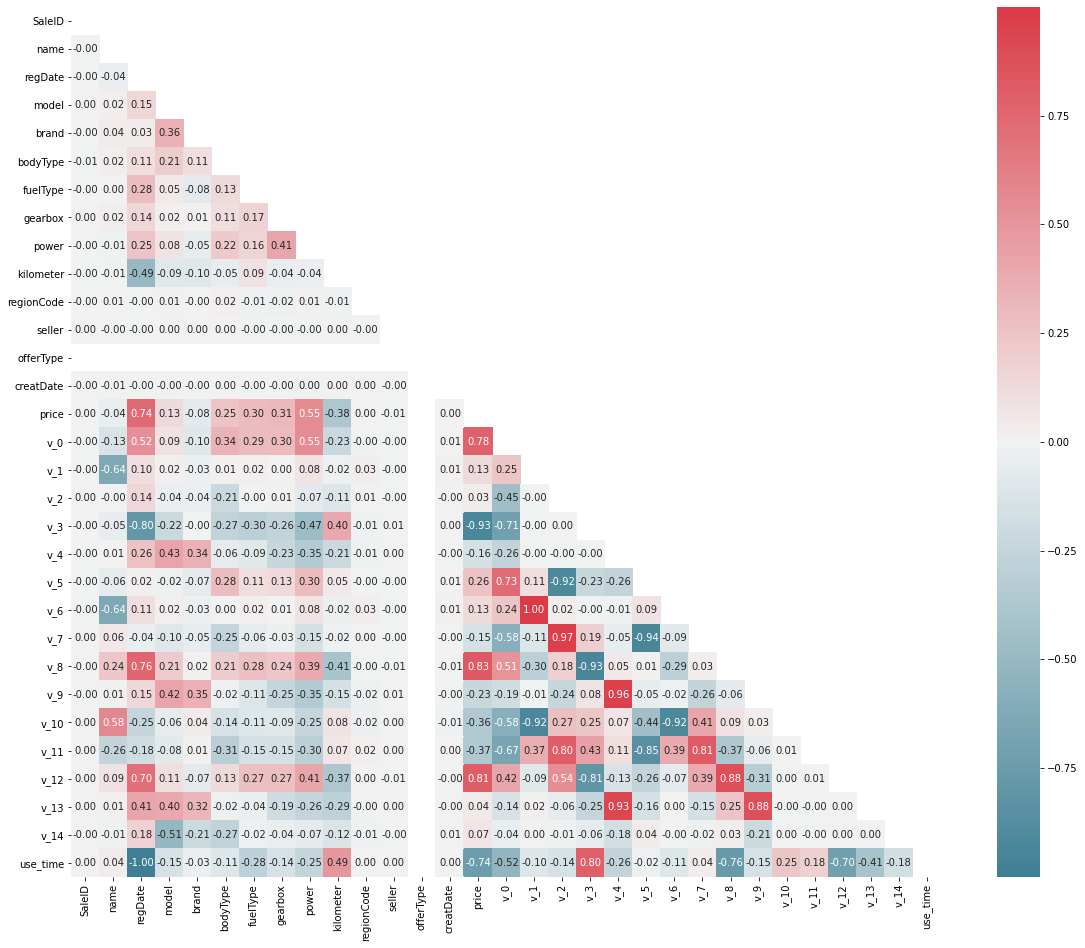

In [23]:
plt.figure(figsize = (20,16))
mask = np.zeros_like(mcor)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10,as_cmap = True)
sns.heatmap(mcor,mask = mask, cmap = cmap , annot = True, square = True,fmt = '0.2f')
plt.show()

**<font size = 4 color = "#414141">2.2.1删除相关性绝对值小于0.1的特征</fomt>**

In [24]:
drop_features = ['v_14','v_13','v_7','v_6','v_2','v_1','seller','creatDate'
                ,'offerType','regionCode','notRepairedDamage','brand','name','SaleID']
extract_features = [col for col in all_data.columns if col not in drop_features]
all_data = all_data[extract_features]

**<font size = 5 color = "#414141">2.3查看训练数据和测试数据是否在同样的区间</font>**

<font size = 4 color = "#414141">个人感觉使用这种方法后模型的泛化能力较差</font>

In [25]:
all_data.columns

Index(['regDate', 'model', 'bodyType', 'fuelType', 'gearbox', 'power',
       'kilometer', 'price', 'v_0', 'v_3', 'v_4', 'v_5', 'v_8', 'v_9', 'v_10',
       'v_11', 'v_12', 'use_time'],
      dtype='object')

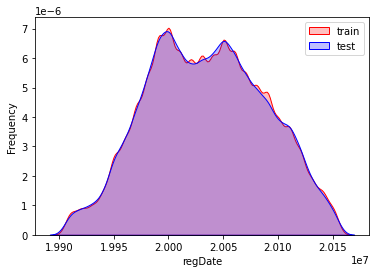

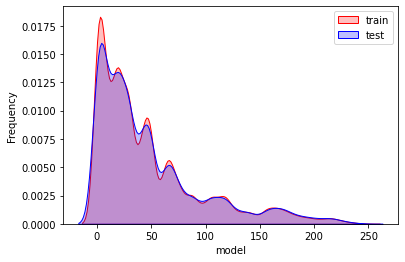

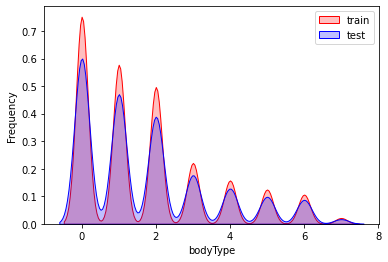

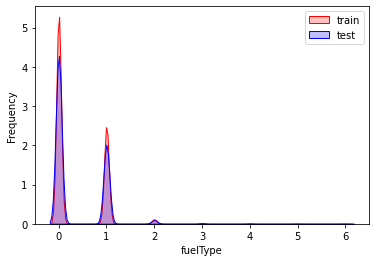

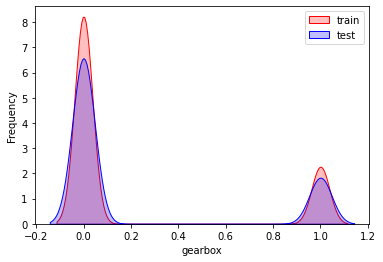

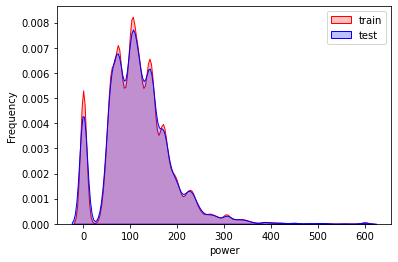

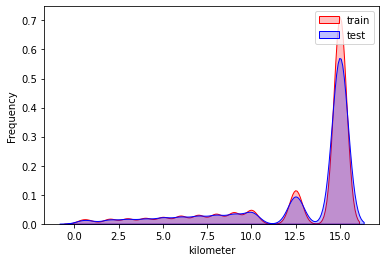

d:\python\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


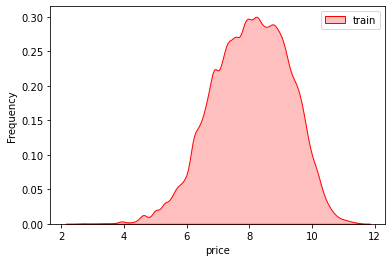

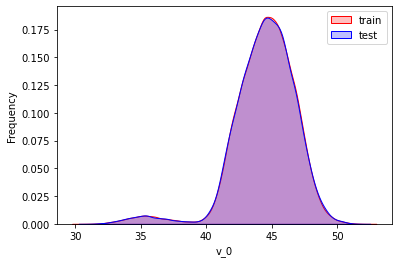

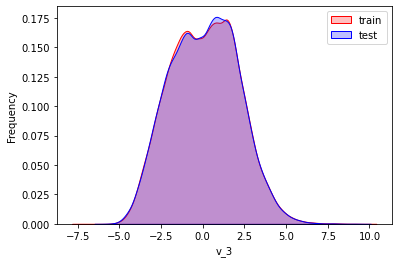

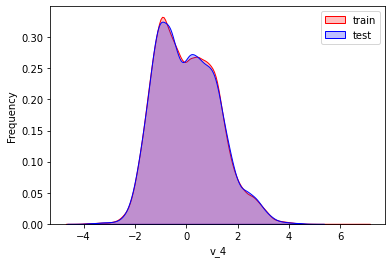

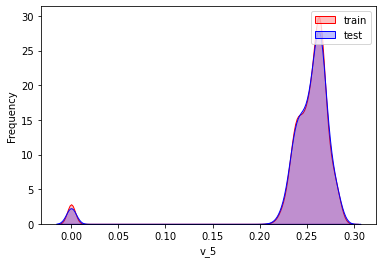

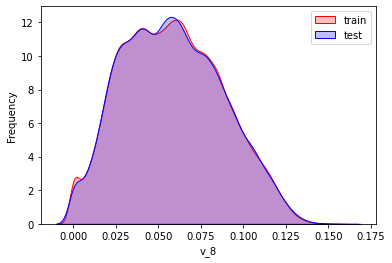

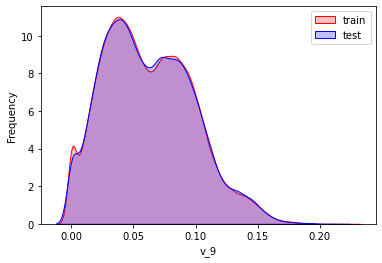

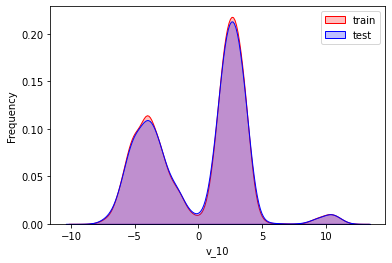

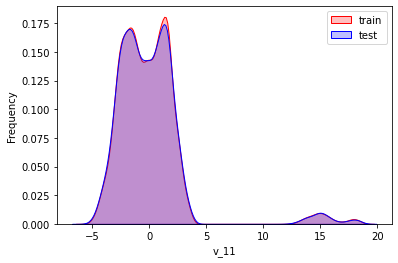

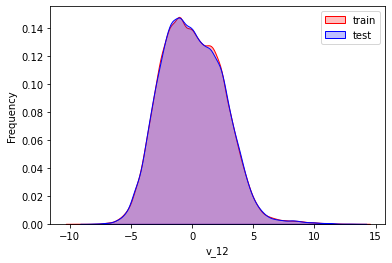

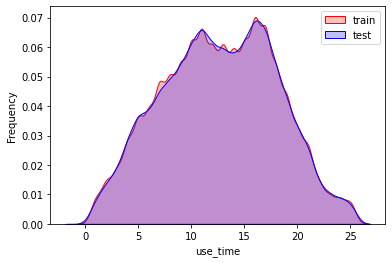

In [26]:
for col in all_data.columns:
    g = sns.kdeplot(all_data[col][:150000],color = "Red",shade = True)
    g = sns.kdeplot(all_data[col][150000:],color = "Blue",shade = True)
    g.set_xlabel(col)
    g.set_ylabel('Frequency')
    g = g.legend(["train","test"])
    plt.show()

数据所在区间近乎完全相同，不用删除特征

**<font size = 6 color = "#414141">三、选择模型</font>**

In [27]:
Y_data = pd.DataFrame(Y_data)
X_data = all_data[:150000]
X_data.drop(['price'],axis = 1,inplace = True)
X_test = all_data[150000:]
X_test.drop(['price'],axis = 1,inplace = True)
x_train,x_yan,y_train,y_yan = train_test_split(X_data,Y_data,test_size = 0.3,random_state = 1)

d:\python\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
models = []
svc = svm.SVR()
models.append(svc)
reg = linear_model.Ridge(alpha=.5)
models.append(reg)
rfr = RandomForestRegressor(n_estimators = 10)
models.append(rfr)
lgb = LGBMRegressor(learning_rate = 0.1)
models.append(lgb)

In [29]:
Y_data

,price
0,7.523481
1,8.188967
2,8.736007
3,7.783641
4,8.556606
...,...
149995,8.682877
149996,9.159152
149997,8.922792
149998,8.517193


In [30]:
for i in models:
    min_max_scaler = MinMaxScaler()
    pipeline1 = make_pipeline(min_max_scaler,i)
    pipeline1.fit(x_train,y_train)
    print(i,pipeline1.score(x_yan,y_yan))


d:\python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR() 0.9561753531558823
Ridge(alpha=0.5) 0.9322728048448432


d:\python\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


RandomForestRegressor(n_estimators=10) 0.9530122087739639


d:\python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMRegressor() 0.9554036018585365


**<font size = 6 color = "#414141">四、建模调参</font>**

In [31]:
for i in range(10,15):
    rfr = RandomForestRegressor(n_estimators = i)
    min_max_scaler = MinMaxScaler()
    pipeline1 = make_pipeline(min_max_scaler,rfr)
    pipeline1.fit(x_train,y_train)
    print(i,pipeline1.score(x_yan,y_yan))

d:\python\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


10 0.9527826818207059


d:\python\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


11 0.953058876366985


d:\python\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


12 0.9541125640770036


d:\python\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


13 0.9543735236825798


d:\python\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


14 0.9538732426089339


**<font size = 6 color = "#414141">五、预测</font>**

In [32]:
rfr = RandomForestRegressor(n_estimators = 14)

In [33]:
min_max_scaler = MinMaxScaler()
pipeline1 = make_pipeline(min_max_scaler,rfr)
pipeline1.fit(X_data,Y_data)

d:\python\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=14))])

In [34]:
Y_test = pipeline1.predict(X_test)

In [35]:
X_test

,regDate,model,bodyType,fuelType,gearbox,power,kilometer,v_0,v_3,v_4,v_5,v_8,v_9,v_10,v_11,v_12,use_time
0,20000501,67.0,1.0,0.0,0.0,101,15.0,42.142061,1.466344,1.009846,0.236520,0.046233,0.094522,3.619512,-0.280607,-2.019761,16
1,19950211,19.0,2.0,0.0,0.0,73,6.0,43.907034,1.276718,-1.065338,0.261518,0.046784,0.035385,2.997376,-1.406705,-1.020884,21
2,20090606,5.0,4.0,0.0,0.0,120,5.0,45.389665,-2.447316,0.624268,0.261691,0.079655,0.073586,-3.951084,-0.433467,0.918964,7
3,20020601,22.0,1.0,0.0,0.0,58,15.0,42.788775,1.708806,1.119165,0.236050,0.026830,0.096614,-2.846788,2.800267,-2.524610,14
4,20030301,46.0,0.0,0.0,0.0,116,15.0,43.670763,0.470315,0.134032,0.257000,0.057771,0.068852,2.839010,-1.659801,-0.924142,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,20041005,4.0,0.0,0.0,1.0,150,15.0,46.321013,-0.622359,-0.778349,0.263668,0.076393,0.039272,2.072901,-2.531869,1.716978,12
49996,20130409,65.0,0.0,0.0,0.0,179,4.0,48.086547,-2.672160,0.357440,0.255310,0.108425,0.067841,1.358504,-3.290295,4.269809,3
49997,20041211,4.0,0.0,0.0,1.0,147,12.5,46.145279,-0.288329,-0.687112,0.262933,0.071968,0.042966,2.165658,-2.417885,1.370612,12
49998,20020702,40.0,4.0,0.0,1.0,176,15.0,45.507088,-0.434930,-1.845040,0.282106,0.067526,0.009006,2.030114,-2.939244,0.569078,14


In [36]:
Y_test = pd.DataFrame(Y_test,columns = ['price'],index = test_data['SaleID'].values)

In [37]:
Y_test = np.expm1(Y_test)
Y_test

,price
200000,1231.908939
200001,1839.404453
200002,7781.021956
200003,922.851237
200004,2038.786038
...,...
249995,6380.894828
249996,17331.400844
249997,5596.008777
249998,4864.007155


In [38]:
#Y_test.to_csv('submit_rfr_11.24_13.14.csv')